# Работа с файлами и pandas

## 1. Библиотека os

In [1]:
pwd

'/Users/randomwalk/Desktop'

In [3]:
cd ../Downloads

/Users/randomwalk/Downloads


In [5]:
pwd

'/Users/randomwalk/Downloads'

In [6]:
cd /Users/randomwalk/Desktop

/Users/randomwalk/Desktop


In [7]:
pwd

'/Users/randomwalk/Desktop'

In [8]:
import os # библиотека для работы с операционной системой компа

In [11]:
os.remove('grrra.java')

In [13]:
os.mkdir('sem08')

In [17]:
os.replace('com.json', 'sem08/com.json')

In [20]:
os.replace('myFile.txt', 'sem08/myFile.txt')

In [21]:
os.listdir('sem08')

['com.json', 'myFile.txt']

## 2. Разные расширения 

__.txt__ - просто тупо текст, записанный внутри файлика

In [25]:
pwd

'/Users/randomwalk/Desktop'

In [23]:
!cat 'sem08/myFile.txt'  # скорее всего не работает на windows

Привет, сегодня отличный 
день!

In [48]:
f = open('/Users/randomwalk/Desktop/sem08/myFile.txt')

In [49]:
s = f.read()         # считывает файл целиком
# s = f.readline()   # считывает по одной строчке при каждом вызове
# s = f.readlines()  # считывает все строчки в виде листа
s

'Привет, сегодня отличный \nдень!'

In [50]:
# \n - перенос строки
# \t - табуляция (4 пробела)
# \r - перенос каретки в начало строки (устаревшая штука)

In [51]:
f.close()

Постоянно следить за тем, какие файлы открыты, а какие закрыты - влом!

In [ ]:
# r - read 
# w - write (перезапись файла)
# a - append (дозаписать в файл новые строчки)

In [53]:
with open('sem08/myFile.txt', 'r') as f:
    s = f.read()    
s

'Привет, сегодня отличный \nдень!'

In [65]:
with open('sem08/myFile.txt', 'w') as f:
    f.write('Привет, Мир!')

In [87]:
with open('sem08/myFile.txt', 'a') as f:
    f.write('\nЕееее')

In [88]:
!cat sem08/myFile.txt

Привет, Мир!
 Еееее
 Еееее
 Еееее
 	 Еееее
 аааа
 	 Еееее
Еееее

In [89]:
with open('sem08/myFile.txt', 'r') as f:
    s = f.read()    
s

'Привет, Мир!\n Еееее\n Еееее\n Еееее\n \t Еееее\n \t Еееее \n аааа\n \t Еееее\nЕееее'

In [90]:
print(s)

Привет, Мир!
 Еееее
 Еееее
 Еееее
 	 Еееее
 	 Еееее 
 аааа
 	 Еееее
Еееее


__.json -__ с точки зрения питона просто тупо словари, но с ограничениями и некоторым отличием 

In [97]:
import json

with open('sem08/com.json', 'r') as f:
    s = json.load(f)   

s.keys()

dict_keys(['data', 'tresholds'])

In [100]:
m = s['tresholds'][:3]
m

[{'cutoff_up': 0.8999999761581421,
  'inputType': 'embed',
  'cutoff_low': 0.0,
  'sanction': 'found_ok'},
 {'cutoff_up': 0.9399999976158142,
  'inputType': 'embed',
  'cutoff_low': 0.8999999761581421,
  'sanction': 'probably_hatespeech'},
 {'cutoff_up': 0.9900000095367432,
  'inputType': 'embed',
  'cutoff_low': 0.9399999976158142,
  'sanction': 'found_hatespeech'}]

In [102]:
with open('sem08/com_2.json', 'w') as f:
    json.dump(m, f) 

In [103]:
!cat sem08/com_2.json

[{"cutoff_up": 0.8999999761581421, "inputType": "embed", "cutoff_low": 0.0, "sanction": "found_ok"}, {"cutoff_up": 0.9399999976158142, "inputType": "embed", "cutoff_low": 0.8999999761581421, "sanction": "probably_hatespeech"}, {"cutoff_up": 0.9900000095367432, "inputType": "embed", "cutoff_low": 0.9399999976158142, "sanction": "found_hatespeech"}]

In [108]:
dct = {'Маша':10, 'lol': 15}
with open('sem08/file.json', 'w') as f:
    json.dump(dct, f) 

In [109]:
!cat sem08/file.json

{"\u041c\u0430\u0448\u0430": 10, "lol": 15}

__.pickle -__ бинарный формат данных, то есть поток байтов 

In [112]:
import pickle  # Не надо сохранять файлы в pickle, если они больше 2GB

dct = {'Маша':10, 'lol': 15}

with open('sem08/file.pickle', 'wb') as f:
    pickle.dump(dct, f) 

In [113]:
!cat sem08/file.pickle

��       }�(�Маша�K
�lol�Ku.

In [114]:
with open('sem08/file.pickle', 'rb') as f:
    s = pickle.load(f) 
s

{'Маша': 10, 'lol': 15}

__.csv__, __.tsv__, __.xslx__ - таблички

- csv - значения разделенные через запятую
- tsv - значения разделённые знаками табуляции

In [131]:
!head dap_2021.tsv

In [135]:
import pandas as pd 
df = pd.read_csv("dap_2021.tsv", sep='\t', decimal=',')
df.shape

(450, 43)

In [136]:
df.head()

,,Адрес студенческой почты,группа,Login,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
0,Алгазинов Александр Иванович,aialgazinov@edu.hse.ru,БЭК201,dap_econ_2021_1,1.0,5.0,5.0,5.0,5.0,10.0,...,75.0,34.0,33.0,33.0,100.0,NaN,NaN,NaN,"2,935",3.0
1,Арайсси Габриел -,garayssi@edu.hse.ru,БЭК201,dap_econ_2021_2,2.0,5.0,5.0,5.0,4.0,10.0,...,55.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,"1,09",1.0
2,Батавиль Абдулрахман -,abatavil@edu.hse.ru,БЭК201,dap_econ_2021_3,3.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0.0
3,Безуглый Александр Олегович,aobezuglyy_1@edu.hse.ru,БЭК201,dap_econ_2021_4,4.0,5.0,5.0,5.0,4.0,10.0,...,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"2,57",3.0
4,Бочкарев Сергей Максимович,smbochkarev@edu.hse.ru,БЭК201,dap_econ_2021_5,5.0,5.0,5.0,5.0,5.0,10.0,...,40.0,34.0,0.0,33.0,67.0,NaN,NaN,NaN,"2,605",3.0


In [137]:
df.tail()

,,Адрес студенческой почты,группа,Login,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
445,NaN,NaN,NaN,dap_econ_2021_446,446.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,dap_econ_2021_447,447.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,NaN,NaN,NaN,dap_econ_2021_448,448.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,NaN,NaN,NaN,dap_econ_2021_449,449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,Марудас Павлос,pmaroudas@edu.hse.ru,БЭК2011,dap_econ_2021_450,450.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#REF!,NaN


In [ ]:
# Таблица состоит из трёх частей 
# Имена колонок
# Имена строчек
# Значения

In [138]:
df.columns # Имена колонок

Index([' ', 'Адрес студенческой почты', 'группа', 'Login', 'num', 'hw01_a',
       'hw01_b', 'hw01_c', 'hw01_d', 'hw01_e', 'hw01_f', 'hw01_g', 'hw01_h',
       'hw01_i', 'hw01_j', 'hw01',
       'MVP для приложения "Пенькофф Инвестиции" (20 баллов)',
       'Stonks (10 баллов)', 'Аэрохоккей (20 баллов)',
       'Иначе говоря (10 баллов)', 'Каверы (10 баллов)', 'Лоликек (15 баллов)',
       'Сжатие последовательности (15 баллов)',
       'Экзамен по машинному обучению 2 (10 баллов)', 'hw02', 'hw03', 'hw04',
       'hw05', 'cw01_A', 'cw01_B', 'cw01_C', 'cw01_D', 'cw01_E', 'cw01',
       'cw02_A', 'cw02_B', 'cw02_C', 'cw02', 'cw03', 'КР', 'ЭКЗ', 'Сумма',
       'Итог'],
      dtype='object')

In [160]:
df.columns.values # превратили имена колонок в numpy вектор

array([' ', 'Адрес студенческой почты', 'группа', 'num', 'hw01_a',
       'hw01_b', 'hw01_c', 'hw01_d', 'hw01_e', 'hw01_f', 'hw01_g',
       'hw01_h', 'hw01_i', 'hw01_j', 'hw01',
       'MVP для приложения "Пенькофф Инвестиции" (20 баллов)',
       'Stonks (10 баллов)', 'Аэрохоккей (20 баллов)',
       'Иначе говоря (10 баллов)', 'Каверы (10 баллов)',
       'Лоликек (15 баллов)', 'Сжатие последовательности (15 баллов)',
       'Экзамен по машинному обучению 2 (10 баллов)', 'hw02', 'hw03',
       'hw04', 'hw05', 'cw01_A', 'cw01_B', 'cw01_C', 'cw01_D', 'cw01_E',
       'cw01', 'cw02_A', 'cw02_B', 'cw02_C', 'cw02', 'cw03', 'КР', 'ЭКЗ',
       'Сумма', 'Итог'], dtype=object)

In [140]:
df['cw01'].mean()

45.97041420118343

In [141]:
df[['hw01', 'hw02', 'cw01', 'cw02']].mean()

hw01    64.718935
hw02    60.246291
cw01    45.970414
cw02    65.234421
dtype: float64

In [142]:
df.index # Имена строчек

RangeIndex(start=0, stop=450, step=1)

In [143]:
df.loc[40]

                                                            Куприянова Ульяна -
Адрес студенческой почты                                ukupriyanova@edu.hse.ru
группа                                                                  БЭК2010
Login                                                          dap_econ_2021_41
num                                                                        41.0
hw01_a                                                                      5.0
hw01_b                                                                      5.0
hw01_c                                                                      5.0
hw01_d                                                                      5.0
hw01_e                                                                     10.0
hw01_f                                                                     10.0
hw01_g                                                                     10.0
hw01_h                                  

In [154]:
# df = df.set_index('Login')
df.set_index('Login', inplace=True)

# Назад откатиться можно df.reset_index( )

In [156]:
df.head()

,,Адрес студенческой почты,группа,num,hw01_a,hw01_b,hw01_c,hw01_d,hw01_e,hw01_f,...,cw01,cw02_A,cw02_B,cw02_C,cw02,cw03,КР,ЭКЗ,Сумма,Итог
Login,,,,,,,,,,,,,,,,,,,,,
dap_econ_2021_1,Алгазинов Александр Иванович,aialgazinov@edu.hse.ru,БЭК201,1.0,5.0,5.0,5.0,5.0,10.0,10.0,...,75.0,34.0,33.0,33.0,100.0,NaN,NaN,NaN,"2,935",3.0
dap_econ_2021_2,Арайсси Габриел -,garayssi@edu.hse.ru,БЭК201,2.0,5.0,5.0,5.0,4.0,10.0,NaN,...,55.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,"1,09",1.0
dap_econ_2021_3,Батавиль Абдулрахман -,abatavil@edu.hse.ru,БЭК201,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0.0
dap_econ_2021_4,Безуглый Александр Олегович,aobezuglyy_1@edu.hse.ru,БЭК201,4.0,5.0,5.0,5.0,4.0,10.0,10.0,...,95.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,"2,57",3.0
dap_econ_2021_5,Бочкарев Сергей Максимович,smbochkarev@edu.hse.ru,БЭК201,5.0,5.0,5.0,5.0,5.0,10.0,10.0,...,40.0,34.0,0.0,33.0,67.0,NaN,NaN,NaN,"2,605",3.0


In [157]:
df.loc['dap_econ_2021_5']

                                                        Бочкарев Сергей Максимович
Адрес студенческой почты                                    smbochkarev@edu.hse.ru
группа                                                                      БЭК201
num                                                                            5.0
hw01_a                                                                         5.0
hw01_b                                                                         5.0
hw01_c                                                                         5.0
hw01_d                                                                         5.0
hw01_e                                                                        10.0
hw01_f                                                                        10.0
hw01_g                                                                        10.0
hw01_h                                                                        20.0
hw01

In [159]:
# Значения - нумпаевская матрица
df.values

array([['Алгазинов Александр Иванович', 'aialgazinov@edu.hse.ru',
        'БЭК201', ..., nan, '2,935', 3.0],
       ['Арайсси Габриел -', 'garayssi@edu.hse.ru', 'БЭК201', ..., nan,
        '1,09', 1.0],
       ['Батавиль Абдулрахман -', 'abatavil@edu.hse.ru', 'БЭК201', ...,
        nan, '0', 0.0],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Марудас Павлос', 'pmaroudas@edu.hse.ru', 'БЭК2011', ..., nan,
        '#REF!', nan]], dtype=object)

## 3. Работа с табличкой

In [163]:
df_s = df[['hw01', 'hw02', 'cw01', 'cw02']]
df_s.head()

,hw01,hw02,cw01,cw02
Login,,,,
dap_econ_2021_1,105.0,66.0,75.0,100.0
dap_econ_2021_2,68.0,20.0,55.0,0.0
dap_econ_2021_3,0.0,0.0,0.0,0.0
dap_econ_2021_4,104.0,110.0,95.0,0.0
dap_econ_2021_5,105.0,101.0,40.0,67.0


In [164]:
df_s.describe()

,hw01,hw02,cw01,cw02
count,338.000000,337.000000,338.000000,337.000000
mean,64.718935,60.246291,45.970414,65.234421
std,42.077303,42.379681,34.744583,39.639014
min,0.000000,0.000000,0.000000,0.000000
25%,16.000000,10.000000,0.000000,34.000000
50%,84.000000,69.000000,53.000000,67.000000
75%,105.000000,100.000000,75.000000,100.000000
max,105.000000,110.000000,100.000000,100.000000


<AxesSubplot:>

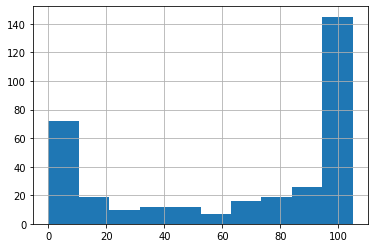

In [169]:
df_s['hw01'].hist()

In [171]:
df_s['hw01'] >= 100

Login
dap_econ_2021_1       True
dap_econ_2021_2      False
dap_econ_2021_3      False
dap_econ_2021_4       True
dap_econ_2021_5       True
                     ...  
dap_econ_2021_446    False
dap_econ_2021_447    False
dap_econ_2021_448    False
dap_econ_2021_449    False
dap_econ_2021_450    False
Name: hw01, Length: 450, dtype: bool

In [173]:
df_s[df_s['hw01'] >= 100].shape

(125, 4)

__Задание:__

Прорешать тетрадку с pandas:  https://nbviewer.jupyter.org/github/hse-econ-data-science/dap_2021_spring/blob/main/sem08_pandas/sem08_pandas_intro.ipynb

## 4. Очень хорошие вопросы 

__А чем отличаются методы от функций__ 

In [122]:
# любая переменная в python - это объект 

class Game():
    def __init__(self, size):
        self.size = size
    
    def play(self):
        print(self.size)

In [124]:
x = Game(20)
x.size
x.play()

20


In [125]:
y = Game(30)
y.size
y.play()

30


In [126]:
# если функция прописана внутри интерфейса, она - метод
# ессли функциия прописана вне интерфейса - функция

In [129]:
import numpy as np
x = np.array([1,2,3,4,5])
x.sum()   # метод

15

In [130]:
np.sum(x) # функция

15

__Что такое кодировка?__

In [184]:
a = 'Привет, мир!'
a = a.encode('cp1251')
a

b'\xcf\xf0\xe8\xe2\xe5\xf2, \xec\xe8\xf0!'

In [185]:
a = a.decode('cp1251')
a

'Привет, мир!'

In [186]:
a = 'Привет, мир!'
a = a.encode('utf-8')
a

b'\xd0\x9f\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb5\xd1\x82, \xd0\xbc\xd0\xb8\xd1\x80!'

In [187]:
a = a.decode('utf-8')
a

'Привет, мир!'

In [190]:
with open('sem08/myFile.txt', 'r', encoding='utf-8') as f:
    s = f.read()    
s

''